In [1]:
import pandas as pd
import os

# Specify the directory containing the pickle files
directory = '../ressources/final_experiments/result_increasing_size_exp'

# Initialize a list or dictionary to hold the DataFrames
dataframes = {}

# Iterate through the files in the directory
for filename in os.listdir(directory):
    if filename.endswith('.pickle'):  # Check for pickle files
        file_path = os.path.join(directory, filename)  # Create full file path
        df = pd.read_pickle(file_path)  # Load the DataFrame from the pickle file
        dataframes[filename] = df  # Store the DataFrame in the dictionary

# Now you can access your DataFrames using the filenames as keys
# For example, to access the DataFrame from 'file1.pkl':
# df1 = dataframes['file1.pkl']


In [2]:
list(dataframes.values())[0].head(3)

,index,description,configuration,parameters,argos,behavior_tree,scores,avg_score,type,lightstype,arenatype,robotstype,llm_scores,llm_behavior_tree,llm_avg_score
0,0,The environment is a circular arena with radiu...,"<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=CircularArena(radiu...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",--nroot 3 --nchildroot 4 --n0 0 --nchild0 2 --...,"[4.0, 2.0, 4.0, 5.0, 3.0, 4.0, 1.0, 3.0, 5.0, ...",3.600000,Foraging,TargetLights,CircularArena,CenteredSwarm,"[3.0, 3.0, 4.0, 0.0, 3.0, 2.0, 6.0, 0.0, 0.0, ...",--nroot 3 --nchildroot 3 --n0 0 --nchild0 2 -...,2.400000
1,1,The environment consists of a circular arena w...,"<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=CircularArena(radiu...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",--nroot 3 --nchildroot 1 --n0 0 --nchild0 2 --...,"[3.0, 3.0, 4.0, 2.0, 1.0, 2.0, 5.0, 3.0, 4.0, ...",2.900000,Foraging,UniformLights,CircularArena,CenteredSwarm,[],--nroot 3 --nchildroot 2 --nroot0 0 --nchildr...,NaN
2,2,"With a radius of 3.44 meters, the circular are...","<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=CircularArena(radiu...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",--nroot 3 --nchildroot 3 --n0 0 --nchild0 2 --...,"[-8.57746, -4.79552, -7.16427, -9.41532, -6.30...",-7.018138,Connection,UniformLights,CircularArena,CenteredSwarm,"[-6.93895, -8.89168, -7.16934, -7.99283, -8.84...",--nroot 3 --nchildroot 2 --n0 0 --nchild0 2 -...,-7.854127


In [3]:
# Initialize a dictionary to hold the results
results = {}

# Iterate through each DataFrame in the dataframes dictionary
for filename, df in dataframes.items():
    # Group by 'type' and calculate the mean of 'llm_avg_score'
    result = df.groupby(['type'])[['llm_avg_score']].mean().reset_index()
    
    # Calculate the overall mean of 'llm_avg_score'
    overall_mean = df['llm_avg_score'].mean()
    
    # Add the overall mean to the result DataFrame
    overall_row = pd.DataFrame({'type': ['Average'], 'llm_avg_score': [overall_mean]})
    result = pd.concat([result, overall_row], ignore_index=True)
    
    # Store the result in the results dictionary with the filename as the key
    results[filename] = result

# Now you can access the results for each DataFrame using the filenames as keys
# For example, to access the result for 'file1.pkl':
# result_file1 = results['file1.pkl']

# Optionally, print the results for each DataFrame
for filename, result in results.items():
    print(f"Results for {filename}:")
    print(result)
    print()  # Print a newline for better readability


Results for llm_evaluated_450.pickle:
           type  llm_avg_score
0   Aggregation       0.208184
1    Connection     -19.900684
2  Distribution     -13.046853
3      Foraging       1.408000
4       Average      -8.727095

Results for llm_evaluated_675.pickle:
           type  llm_avg_score
0   Aggregation       0.195050
1    Connection     -17.180978
2  Distribution     -12.511791
3      Foraging       0.901493
4       Average      -6.202916

Results for llm_evaluated_1350.pickle:
           type  llm_avg_score
0   Aggregation       0.230982
1    Connection     -16.568109
2  Distribution     -12.463888
3      Foraging       2.304000
4       Average      -6.084903

Results for llm_evaluated_225.pickle:
           type  llm_avg_score
0   Aggregation       0.260572
1    Connection     -12.315626
2  Distribution     -14.794302
3      Foraging       0.677027
4       Average      -5.439218

Results for llm_evaluated_2250.pickle:
           type  llm_avg_score
0   Aggregation       0.21214

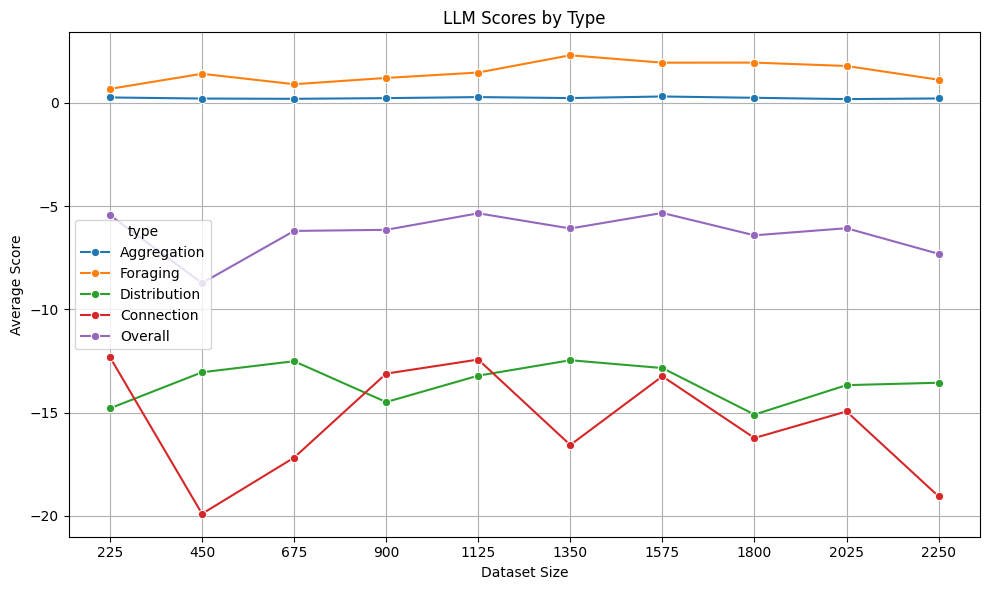

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

# Initialize a dictionary to hold the results
results = {}

# Iterate through each DataFrame in the dataframes dictionary
for filename, df in dataframes.items():
    # Group by 'type' and calculate the mean of 'llm_avg_score'
    result = df.groupby(['type'])[['llm_avg_score']].mean().reset_index()
    
    # Calculate the overall mean of 'llm_avg_score'
    overall_mean = df['llm_avg_score'].mean()
    
    # Add the overall mean to the result DataFrame
    overall_row = pd.DataFrame({'type': ['Overall'], 'llm_avg_score': [overall_mean]})
    result = pd.concat([result, overall_row], ignore_index=True)
    
    # Store the result in the results dictionary with the filename as the key
    results[filename] = result

# Initialize a list to hold the combined results for plotting
combined_results = []

# Iterate through each result in the results dictionary
for filename, result in results.items():
    # Extract integer from the filename using regex
    match = re.search(r'\d+', filename)
    if match:
        x_value = int(match.group())  # Convert the extracted string to an integer
        # Add the x_value and the corresponding llm_avg_score to the combined results
        for _, row in result.iterrows():
            combined_results.append({'x_value': x_value, 'type': row['type'], 'llm_avg_score': row['llm_avg_score']})

# Create a DataFrame from the combined results
combined_df = pd.DataFrame(combined_results)

# Sort the DataFrame by x_value
combined_df = combined_df.sort_values(by='x_value')

# Plotting with Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=combined_df, x='x_value', y='llm_avg_score', hue='type', marker='o')

# Adding labels and title
plt.xlabel('Dataset Size')
plt.ylabel('Average Score')
plt.title('LLM Scores by Type')
plt.grid()
plt.xticks(combined_df['x_value'].unique())  # Set x-ticks to the unique x values
plt.tight_layout()

# Show the plot
plt.show()


{'Aggregation': {'min': 0.18134474533333333, 'max': 0.30745048366666666}, 'Connection': {'min': -19.90068361698113, 'max': -12.31562564637681}, 'Distribution': {'min': -15.095947644736842, 'max': -12.463887786046511}, 'Foraging': {'min': 0.677027027027027, 'max': 2.3040000000000003}}


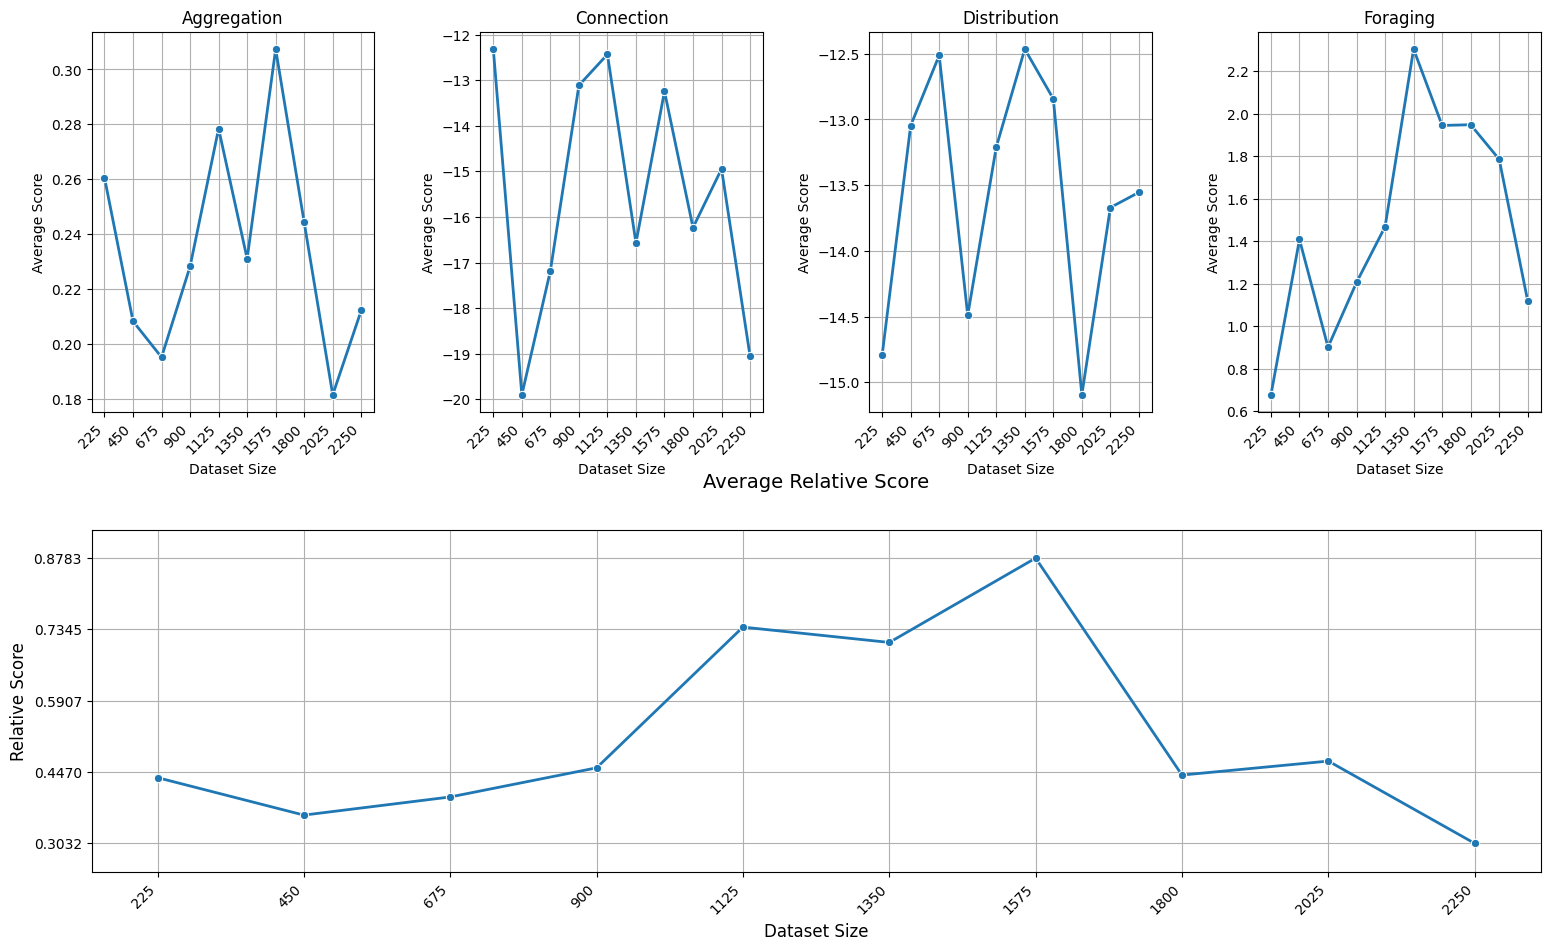

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re

def compute_overall_average(df, minmax_avgs):
    # Group by 'type' and calculate the mean of 'llm_avg_score'
    type_means = df.groupby('type')['llm_avg_score'].mean().to_dict()
    
    # Scale the scores by type according to the min-max values
    scaled_scores = {}
    for t, mean_score in type_means.items():
        min_val = minmax_avgs[t]['min']
        max_val = minmax_avgs[t]['max']
        if max_val > min_val:
            scaled_score = (mean_score - min_val) / (max_val - min_val)
        else:
            scaled_score = 0
        scaled_scores[t] = scaled_score

    # Compute overall mean as the average of scaled scores
    overall_mean = np.mean(list(scaled_scores.values()))
    scaled_scores['Overall'] = overall_mean
    
    return pd.DataFrame(list(scaled_scores.items()), columns=['type', 'llm_avg_score'])

minmax_avgs = {}
df_avgs = {}

# Iterate through each DataFrame in the dataframes dictionary
for k, f in dataframes.items():
    type_means = f.groupby('type')['llm_avg_score'].mean()
    for t, mean_value in type_means.items():
        if t not in df_avgs:
            df_avgs[t] = []
        df_avgs[t].append(mean_value)

for t in df_avgs.keys():
    minmax_avgs[t] = {'min': min(df_avgs[t]), 'max': max(df_avgs[t])}
        
print(minmax_avgs)

# Compute scaled overall averages for each file
scaled_results = {}
for filename, df in dataframes.items():
    result = compute_overall_average(df, minmax_avgs)
    scaled_results[filename] = result

# Compute original (unscaled) averages for each file
orig_results = {}
for filename, df in dataframes.items():
    orig_results[filename] = df.groupby('type')['llm_avg_score'].mean().reset_index()

# Combine scaled overall results for plotting
combined_scaled = []
for filename, result in scaled_results.items():
    match = re.search(r'\d+', filename)
    if match:
        x_value = int(match.group())
        for _, row in result.iterrows():
            combined_scaled.append({'x_value': x_value, 'type': row['type'], 'llm_avg_score': row['llm_avg_score']})
combined_scaled_df = pd.DataFrame(combined_scaled).sort_values(by='x_value')

# Combine original unscaled results for plotting (excluding overall)
combined_orig = []
for filename, result in orig_results.items():
    match = re.search(r'\d+', filename)
    if match:
        x_value = int(match.group())
        for _, row in result.iterrows():
            combined_orig.append({'x_value': x_value, 'type': row['type'], 'llm_avg_score': row['llm_avg_score']})
combined_orig_df = pd.DataFrame(combined_orig).sort_values(by='x_value')

# Unique x-values for consistent axis ticks
x_values = sorted(combined_orig_df['x_value'].unique())

# Create a figure with specified subplots:
fig, axes = plt.subplots(2, 4, figsize=(16, 10), gridspec_kw={'height_ratios': [1, 0.8]})

# First row: Plot original unscaled scores for each type (excluding any overall row)
types = [t for t in combined_orig_df['type'].unique()]
for i, t in enumerate(types):
    if i >= 4:  # In case there are more than 4 types
        break
    ax = axes[0, i]
    sns.lineplot(
        data=combined_orig_df[combined_orig_df['type'] == t],
        x='x_value',
        y='llm_avg_score',
        marker='o',
        ax=ax,
        linewidth=2,
        markersize=6
    )
    ax.set_title(t, fontsize=12)
    ax.set_xlabel('Dataset Size', fontsize=10)
    ax.set_ylabel('Average Score', fontsize=10)
    ax.grid(True)
    ax.set_xticks(x_values)
    ax.set_xticklabels(x_values, rotation=45, ha='right')

# Second row: Plot overall scaled average (spanning full width)
overall_ax = fig.add_subplot(2, 1, 2)
sns.lineplot(
    data=combined_scaled_df[combined_scaled_df['type'] == 'Overall'],
    x='x_value',
    y='llm_avg_score',
    marker='o',
    ax=overall_ax,
    linewidth=2,
    markersize=6
)
overall_ax.set_title('Average Relative Score', fontsize=14, pad=30)
overall_ax.set_xlabel('Dataset Size', fontsize=12)
overall_ax.set_ylabel('Relative Score', fontsize=12)
overall_ax.grid(True)
overall_ax.set_xticks(x_values)
overall_ax.set_xticklabels(x_values, rotation=45, ha='right', fontsize=10)

y_vals = combined_scaled_df[combined_scaled_df['type'] == 'Overall']['llm_avg_score']
y_min, y_max = y_vals.min(), y_vals.max()
y_padding = (y_max - y_min) * 0.1 if y_max != y_min else 0.1
overall_ax.set_ylim(y_min - y_padding, y_max + y_padding)
overall_ax.set_yticks(np.linspace(y_min, y_max, num=5))

# Hide unused subplots in the second row
for ax in axes[1, :]:
    ax.axis('off')

plt.subplots_adjust(hspace=0.9, wspace=0.4)
plt.tight_layout(pad=2.5)
plt.show()


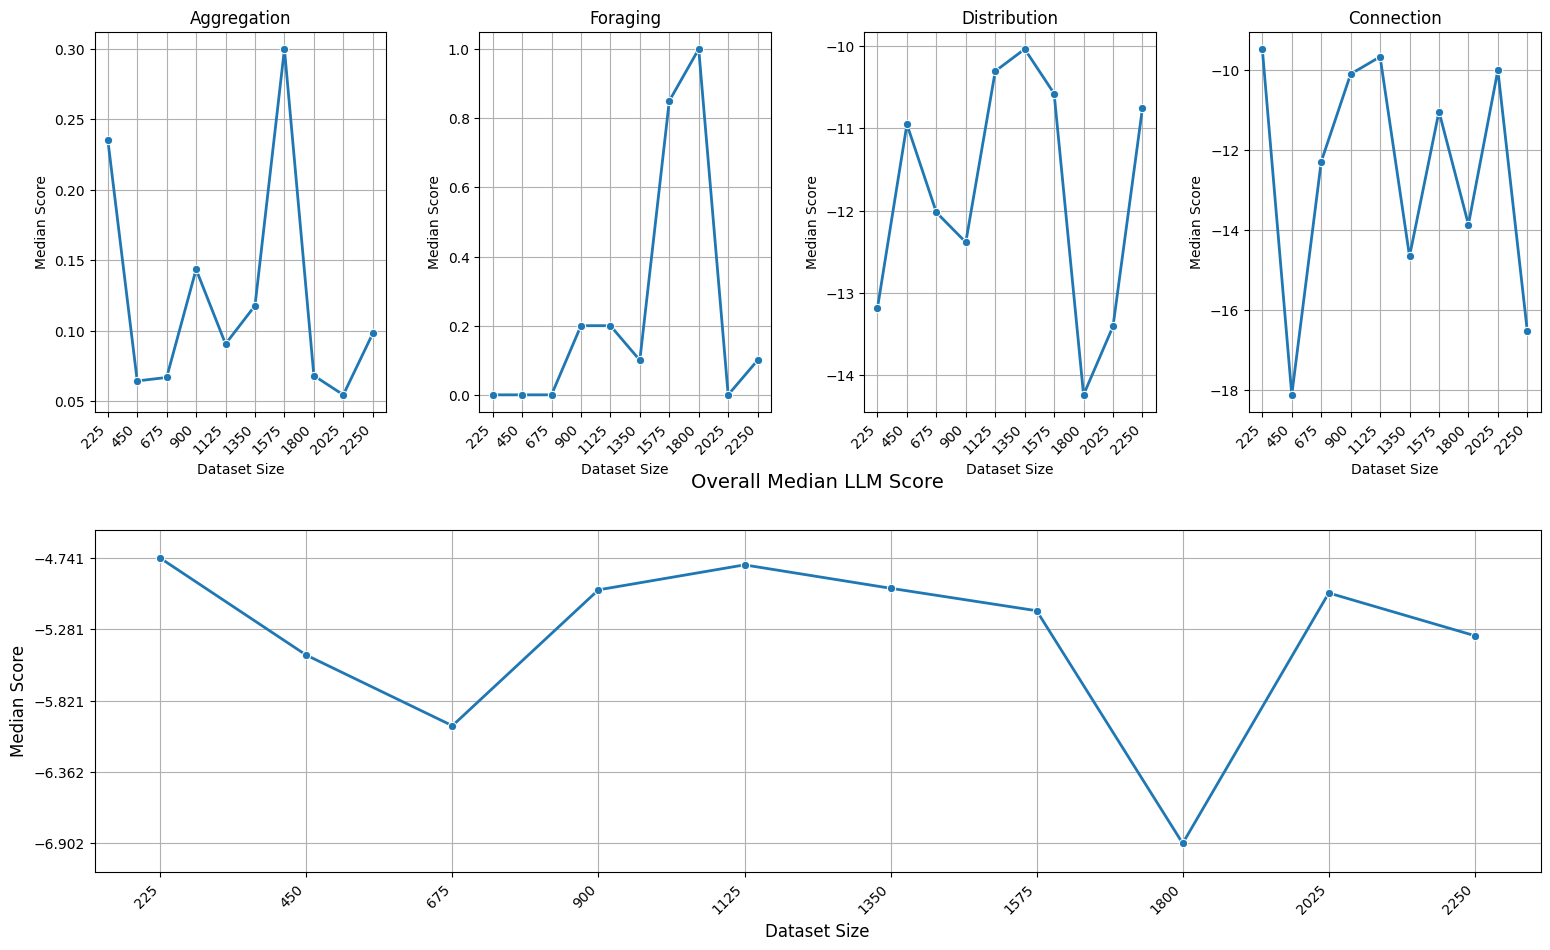

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re

def compute_overall_median(df):
    # Group by 'type' and calculate the median of 'llm_avg_score'
    type_medians = df.groupby('type')['llm_avg_score'].median().to_dict()
    # Compute overall median as the median of type medians
    overall_median = np.median(list(type_medians.values()))
    # Add the overall median manually
    type_medians['Overall'] = overall_median
    # Convert to DataFrame
    return pd.DataFrame(list(type_medians.items()), columns=['type', 'llm_avg_score'])

# Initialize a dictionary to hold the results
results = {}

# Iterate through each DataFrame in the dataframes dictionary
for filename, df in dataframes.items():
    result = compute_overall_median(df)
    results[filename] = result

# Collect combined results for plotting
combined_results = []
for filename, result in results.items():
    match = re.search(r'\d+', filename)
    if match:
        x_value = int(match.group())  # Extract integer from filename
        for _, row in result.iterrows():
            combined_results.append({'x_value': x_value, 'type': row['type'], 'llm_avg_score': row['llm_avg_score']})

# Create a DataFrame from combined results and sort by x_value
combined_df = pd.DataFrame(combined_results).sort_values(by='x_value')

# Unique x-values for consistent axis ticks
x_values = sorted(combined_df['x_value'].unique())

# Create a figure with a specified size
fig, axes = plt.subplots(2, 4, figsize=(16, 10), gridspec_kw={'height_ratios': [1, 0.8]})  # Adjusted height ratio

# Create individual plots for each type (excluding 'Overall')
types = [t for t in combined_df['type'].unique() if t != 'Overall']
for i, t in enumerate(types):  
    ax = axes[0, i]
    sns.lineplot(data=combined_df[combined_df['type'] == t], x='x_value', y='llm_avg_score', marker='o', ax=ax, linewidth=2, markersize=6)
    ax.set_title(t, fontsize=12)
    ax.set_xlabel('Dataset Size', fontsize=10)
    ax.set_ylabel('Median Score', fontsize=10)  # Updated label to reflect median
    ax.grid(True)
    ax.set_xticks(x_values)
    ax.set_xticklabels(x_values, rotation=45, ha='right')

# Create the overall median plot that spans the full width
overall_ax = fig.add_subplot(2, 1, 2)
sns.lineplot(data=combined_df[combined_df['type'] == 'Overall'], x='x_value', y='llm_avg_score', marker='o', ax=overall_ax, linewidth=2, markersize=6)

# Adjustments for second-row subplot
overall_ax.set_title('Overall Median LLM Score', fontsize=14, pad=30)  # Updated title to reflect median
overall_ax.set_xlabel('Dataset Size', fontsize=12)
overall_ax.set_ylabel('Median Score', fontsize=12)  # Updated label to reflect median
overall_ax.grid(True)

# Fix x-axis ticks for overall plot
overall_ax.set_xticks(x_values)
overall_ax.set_xticklabels(x_values, rotation=45, ha='right', fontsize=10)

# Fix y-axis range for the overall plot to remove excessive whitespace but keep padding
y_min = combined_df[combined_df['type'] == 'Overall']['llm_avg_score'].min()
y_max = combined_df[combined_df['type'] == 'Overall']['llm_avg_score'].max()
y_padding = (y_max - y_min) * 0.1  # Add 10% padding for spacing
overall_ax.set_ylim(y_min - y_padding, y_max + y_padding)

# Fix y-axis ticks for overall plot
overall_ax.set_yticks(np.linspace(y_min, y_max, num=5))

# Remove extra x and y labels from the unused subplots in the second row
for ax in axes[1, :]:
    ax.axis('off')

# Adjust spacing to reduce overlap
plt.subplots_adjust(hspace=0.9, wspace=0.4)
plt.tight_layout(pad=2.5)
plt.show()


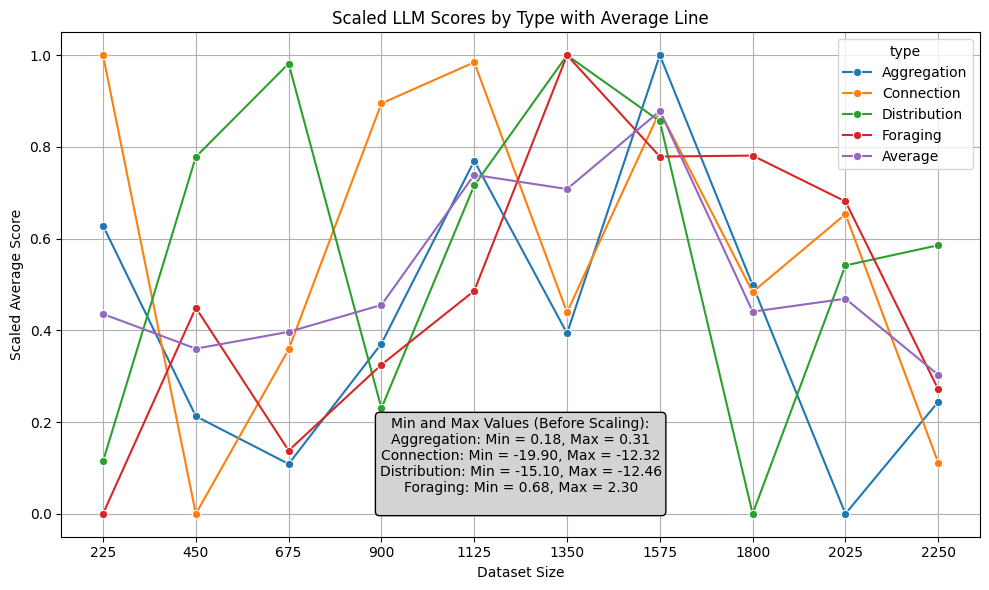

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

# Initialize a list to hold all results
all_results = []

# Iterate through each DataFrame in the dataframes dictionary
for filename, df in dataframes.items():
    # Group by 'type' and calculate the mean of 'llm_avg_score'
    result = df.groupby(['type'])[['llm_avg_score']].mean().reset_index()
    
    # Add a column for the filename (or x_value) for later use
    match = re.search(r'\d+', filename)
    if match:
        x_value = int(match.group())
        result['x_value'] = x_value
    
    # Append the result to the all_results list
    all_results.append(result)

# Concatenate all results into a single DataFrame
combined_df = pd.concat(all_results, ignore_index=True)

# Calculate min and max values for each type before scaling
min_max_values = combined_df.groupby('type')['llm_avg_score'].agg(['min', 'max']).reset_index()

# Split the DataFrame by type and scale the scores
scaled_results = []

# Get unique types
unique_types = combined_df['type'].unique()

for t in unique_types:
    # Filter the DataFrame for the current type
    type_df = combined_df[combined_df['type'] == t].copy()  # Use .copy() to avoid SettingWithCopyWarning
    
    # Calculate min and max for scaling
    min_score = type_df['llm_avg_score'].min()
    max_score = type_df['llm_avg_score'].max()
    
    # Scale the scores using .loc to avoid warnings
    if max_score != min_score:  # Avoid division by zero
        type_df.loc[:, 'scaled_score'] = (type_df['llm_avg_score'] - min_score) / (max_score - min_score)
    else:
        type_df.loc[:, 'scaled_score'] = 0  # If all values are the same, set scaled score to 0
    
    # Append the scaled results to the list
    scaled_results.append(type_df)

# Concatenate all scaled results into a single DataFrame
final_scaled_df = pd.concat(scaled_results, ignore_index=True)

# Calculate the average scaled score across all types for each x_value
average_scaled_df = final_scaled_df.groupby('x_value')['scaled_score'].mean().reset_index()
average_scaled_df['type'] = 'Average'  # Add a column for the average type

# Append the average scaled scores to the final DataFrame
final_scaled_df = pd.concat([final_scaled_df, average_scaled_df], ignore_index=True)

# Plotting with Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=final_scaled_df, x='x_value', y='scaled_score', hue='type', marker='o')

# Adding labels and title
plt.xlabel('Dataset Size')
plt.ylabel('Scaled Average Score')
plt.title('Scaled LLM Scores by Type with Average Line')
plt.grid()
plt.xticks(final_scaled_df['x_value'].unique())  # Set x-ticks to the unique x values

# Add info box for min and max values
info_text = "Min and Max Values (Before Scaling):\n"
for index, row in min_max_values.iterrows():
    info_text += f"{row['type']}: Min = {row['min']:.2f}, Max = {row['max']:.2f}\n"

# Place the info box on the plot, centered at the x-axis and moved down on the y-axis
plt.gca().text(0.5, 0.05, info_text, transform=plt.gca().transAxes, fontsize=10,
                verticalalignment='bottom', horizontalalignment='center',
                bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='lightgrey'))


plt.tight_layout()

# Show the plot
plt.show()


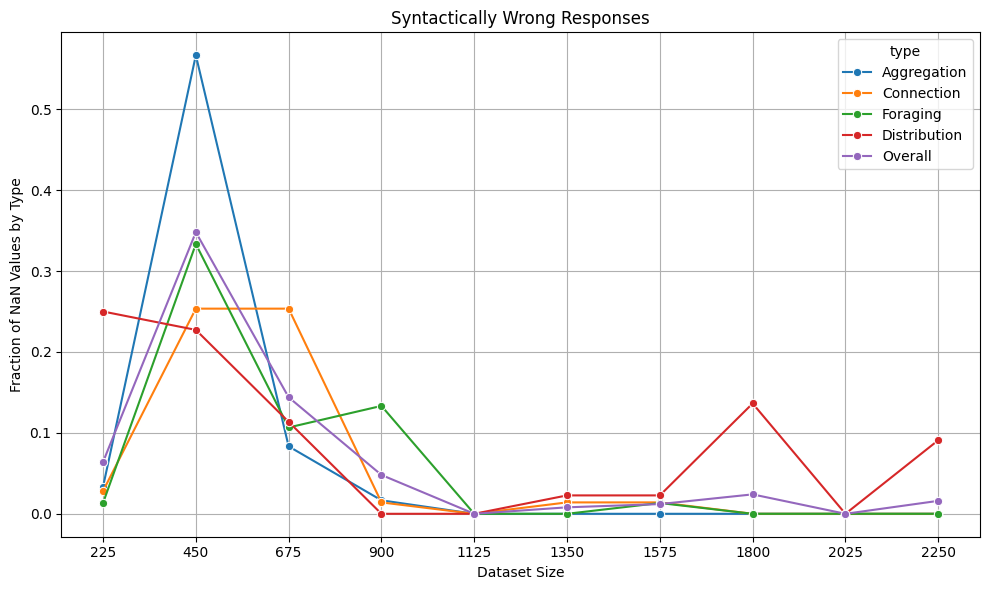

In [8]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

# Initialize a dictionary to hold the NaN fractions
nan_results = {}

# Iterate through each DataFrame in the dataframes dictionary
for filename, df in dataframes.items():
    # Initialize lists to hold scores and types
    scores = []
    types = []
    
    # Extract llm_avg_score and type into lists
    for index, row in df.iterrows():
        scores.append(row['llm_avg_score'])
        types.append(row['type'])
    
    # Calculate NaN counts and total counts per category
    unique_types = set(types)
    nan_count = {t: 0 for t in unique_types}
    total_count = {t: 0 for t in unique_types}
    
    for score, t in zip(scores, types):
        total_count[t] += 1
        if score is None or (isinstance(score, float) and np.isnan(score)):
            nan_count[t] += 1
    
    # Calculate the fraction of NaN values per category
    nan_fraction = {t: nan_count[t] / total_count[t] if total_count[t] > 0 else 0 for t in unique_types}
    
    # Calculate overall NaN fraction for the entire DataFrame
    overall_nan_count = sum(nan_count.values())
    overall_total_count = len(scores)
    overall_nan_fraction = overall_nan_count / overall_total_count if overall_total_count > 0 else 0
    
    # Store results in a list for plotting
    results = []
    for t in unique_types:
        results.append({'type': t, 'nan_fraction': nan_fraction[t]})
    
    # Add overall result
    results.append({'type': 'Overall', 'nan_fraction': overall_nan_fraction})
    
    # Store the NaN fractions in the nan_results dictionary with the filename as the key
    nan_results[filename] = results

# Initialize a list to hold the combined NaN fractions for plotting
combined_nan_fractions = []

# Iterate through each result in the nan_results dictionary
for filename, nan_count in nan_results.items():
    # Extract integer from the filename using regex
    match = re.search(r'\d+', filename)
    if match:
        x_value = int(match.group())  # Convert the extracted string to an integer
        
        # Add NaN fractions to combined NaN fractions
        for row in nan_count:
            combined_nan_fractions.append({'x_value': x_value, 'type': row['type'], 'nan_fraction': row['nan_fraction']})

# Create a DataFrame from the combined NaN fractions
combined_nan_df = pd.DataFrame(combined_nan_fractions)

# Sort the DataFrame by x_value
combined_nan_df = combined_nan_df.sort_values(by='x_value')

# Plotting NaN fractions with Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=combined_nan_df, x='x_value', y='nan_fraction', hue='type', marker='o')

# Adding labels and title
plt.xlabel('Dataset Size')
plt.ylabel('Fraction of NaN Values by Type')
plt.title('Syntactically Wrong Responses')
plt.grid()
plt.xticks(combined_nan_df['x_value'].unique())  # Set x-ticks to the unique x values
plt.tight_layout()

# Show the plot
plt.show()


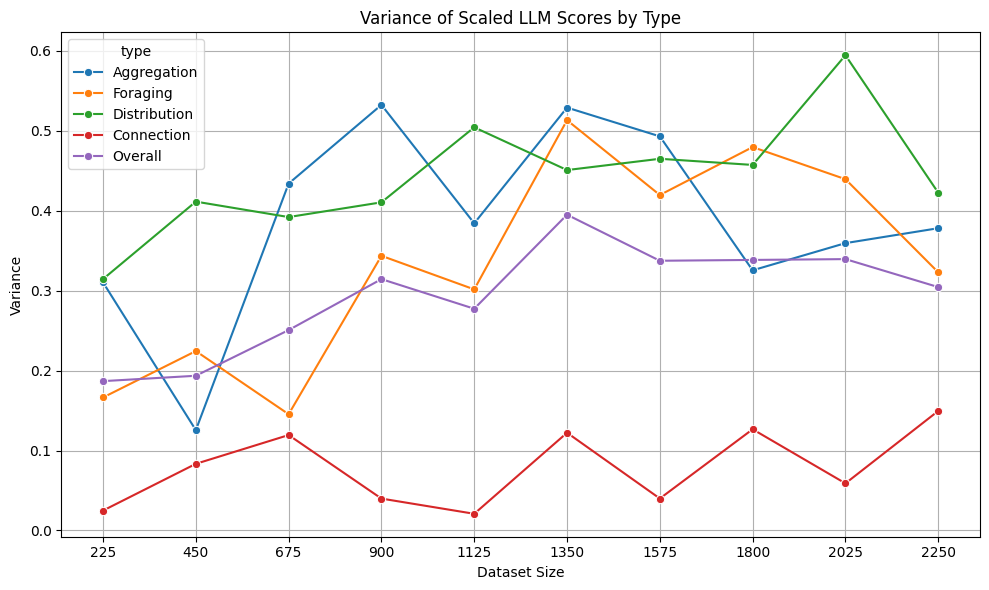

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

# Assume minmax_avgs is defined elsewhere, e.g.,
# minmax_avgs = {'TypeA': {'min': 10, 'max': 90}, 'TypeB': {'min': 20, 'max': 80}, ...}

def compute_scaled_row_variance(row):
    scores = row['llm_scores']
    if isinstance(scores, list) and len(scores) > 1:
        scores = pd.Series(scores).astype(float)
        t = row['type']
        if t in minmax_avgs:
            min_val = minmax_avgs[t]['min']
            max_val = minmax_avgs[t]['max']
            if max_val > min_val:
                scaled_scores = (scores - min_val) / (max_val - min_val)
            else:
                scaled_scores = pd.Series([0] * len(scores))
            return scaled_scores.var()
    return 0

# Initialize a dictionary to hold the average variance results
average_variance_results = {}

# Iterate through each DataFrame in the dataframes dictionary
for filename, df in dataframes.items():
    # Compute the variance for scaled llm_scores for each row
    df['row_variance'] = df.apply(compute_scaled_row_variance, axis=1)
    
    # Group by 'type' and calculate the average of the row variances
    average_variance = df.groupby('type')['row_variance'].mean().reset_index()
    
    # Add overall average variance
    overall_average_variance = df['row_variance'].mean()
    overall_average_row = pd.DataFrame({'type': ['Overall'], 'row_variance': [overall_average_variance]})
    average_variance = pd.concat([average_variance, overall_average_row], ignore_index=True)
    
    # Store the average variance results with the filename as key
    average_variance_results[filename] = average_variance

# Combine average variance results for plotting
combined_average_variance_results = []
for filename, average_variance in average_variance_results.items():
    match = re.search(r'\d+', filename)
    if match:
        x_value = int(match.group())
        for _, row in average_variance.iterrows():
            combined_average_variance_results.append({
                'x_value': x_value,
                'type': row['type'],
                'average_variance': row['row_variance']
            })

combined_average_variance_df = pd.DataFrame(combined_average_variance_results)
combined_average_variance_df = combined_average_variance_df.sort_values(by='x_value')

# Plotting the average variance of scaled LLM scores
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=combined_average_variance_df,
    x='x_value',
    y='average_variance',
    hue='type',
    marker='o'
)
plt.xlabel('Dataset Size')
plt.ylabel('Variance')
plt.title('Variance of Scaled LLM Scores by Type')
plt.grid()
plt.xticks(combined_average_variance_df['x_value'].unique())
plt.tight_layout()
plt.show()


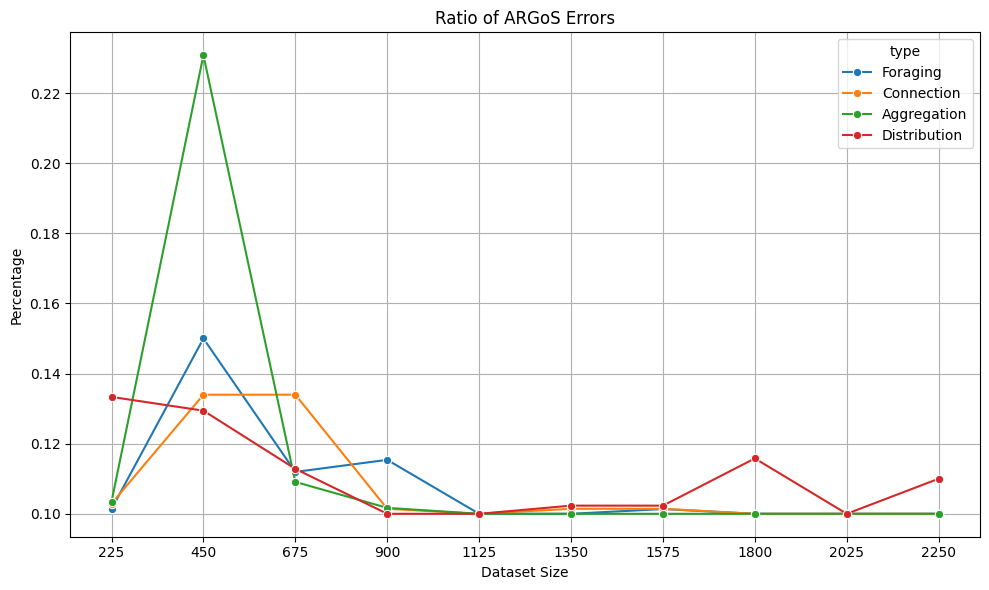

In [10]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

# Initialize a dictionary to hold the average lengths and the longest list length
average_length_results = {}
longest_list_length = 0

# Iterate through each DataFrame in the dataframes dictionary
for filename, df in dataframes.items():
    # Calculate the lengths of the lists in llm_scores
    list_lengths = [len(x) if isinstance(x, list) else 0 for x in df['llm_scores']]
    types = df['type'].tolist()  # Get the types as a list
    
    # Create a dictionary to hold lengths by type
    lengths_by_type = {}
    
    for length, t in zip(list_lengths, types):
        if t not in lengths_by_type:
            lengths_by_type[t] = []
        lengths_by_type[t].append(length)
    
    # Calculate average lengths by type and update the longest list length
    for t, lengths in lengths_by_type.items():
        average_length = np.mean(lengths)
        max_length = max(lengths)
        longest_list_length = max(longest_list_length, max_length)
        
        # Store the average length in the results dictionary with the filename and type as the key
        if filename not in average_length_results:
            average_length_results[filename] = []
        average_length_results[filename].append({'type': t, 'average_length': average_length})

# Initialize a list to hold the combined average lengths for plotting
combined_average_lengths = []

# Iterate through each result in the average_length_results dictionary
for filename, average_length_list in average_length_results.items():
    # Extract integer from the filename using regex
    match = re.search(r'\d+', filename)
    if match:
        x_value = int(match.group())  # Convert the extracted string to an integer
        
        # Add average length results to combined average lengths
        for row in average_length_list:
            # Calculate the reciprocal of the average length
            reciprocal_to_longest = 1 / row['average_length'] if row['average_length'] > 0 else 0
            
            combined_average_lengths.append({'x_value': x_value, 'type': row['type'], 'average_length': row['average_length'], 'reciprocal_to_longest': reciprocal_to_longest})

# Create a DataFrame from the combined average lengths
combined_average_length_df = pd.DataFrame(combined_average_lengths)

# Sort the DataFrame by x_value
combined_average_length_df = combined_average_length_df.sort_values(by='x_value')

# Plotting average lengths with Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=combined_average_length_df, x='x_value', y='reciprocal_to_longest', hue='type', marker='o')

# Adding labels and title
plt.xlabel('Dataset Size')
plt.ylabel('Percentage')
plt.title('Ratio of ARGoS Errors')
plt.grid()
plt.xticks(combined_average_length_df['x_value'].unique())  # Set x-ticks to the unique x values
plt.tight_layout()

# Show the plot
plt.show()
